In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import numpy as np

In [2]:
train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

In [3]:
train_df.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [4]:
test_df.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1915,2015,대형,6.8,159,23.0,LPG,0,2359,1935,수동
1,1164,2012,소형,13.3,108,13.9,가솔린,0,1396,1035,자동
2,2817,2015,중형,14.4,184,41.0,디젤,0,1995,1792,자동
3,2160,2015,대형,10.9,175,46.0,디젤,0,2497,2210,수동
4,1915,2015,대형,6.4,159,23.0,LPG,0,2359,1935,자동


In [5]:
x_train = train_df.drop(['가격'],axis =1)
x_test = test_df.drop(['가격'], axis = 1)
y_train = train_df['가격']
y_test = test_df['가격']

In [6]:
x_train.head()

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동


In [7]:
len(x_train)

71

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [9]:
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'.Aqua Kana',
 '.Arabic UI Display',
 '.Arabic UI Text',
 '.Keyboard',
 '.New York',
 '.SF Compact',
 '.SF Compact Rounded',
 '.SF NS Mono',
 '.SF NS Rounded',
 'Academy Engraved LET',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Apple Braille',
 'Apple Chancery',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Athelas',
 'Avenir',
 'Avenir Next',
 'Avenir Next Condensed',
 'Ayuthaya',
 'Baghdad',
 'Bangla MN',
 'Bangla Sangam MN',
 'Baskerville',
 'Beirut',
 'Big Caslon',
 'Bodoni 72',
 'Bodoni 72 Oldstyle',
 'Bodoni 72 Smallcaps',
 'Bodoni Ornaments',
 'Bradley Hand',
 'Brush Script MT',
 'Chalkboard',
 'Chalkboard SE',
 'Chalkduster',
 'Charter',
 'Cochin',
 'Comic Sans MS',
 'Copperplate',
 'Corsiva Hebrew',
 'Courier New',
 'DIN Alternate',
 'DIN Condensed',
 'Damascus',
 'DecoType Naskh',
 'DejaVu Sans',
 'Dej

In [10]:
plt.rcParams['font.family'] = 'AppleGothic'

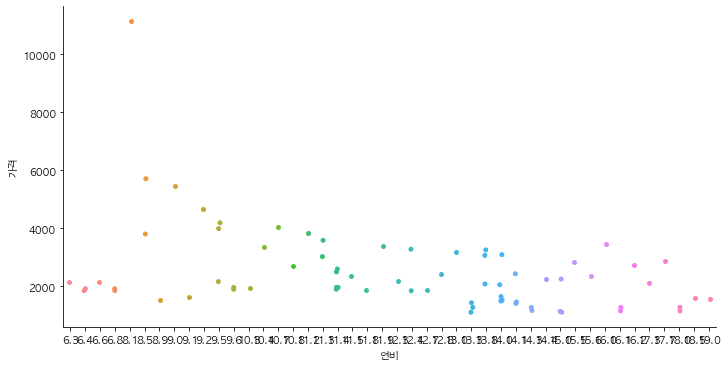

In [11]:
sns.catplot(data = train_df, x="연비", y="가격",aspect=2)

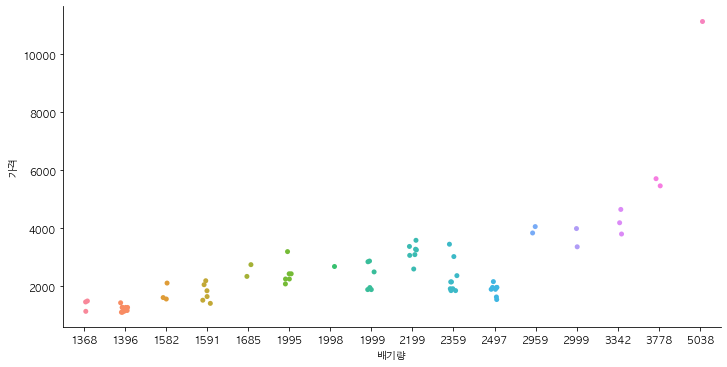

In [12]:
sns.catplot(data=train_df, x="배기량",y="가격",aspect=2)

#

In [13]:
transformer = make_column_transformer(
(OneHotEncoder(),['종류','연료','변속기']),
remainder = 'passthrough')

In [14]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [15]:
x_train

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.999e+03,
        1.300e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.591e+03,
        1.300e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.368e+03,
        1.035e+03],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 1.995e+03,
        1.665e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.999e+03,
        1.585e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 2.199e+03,
        1.691e+03]])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(x_train, y_train)

LinearRegression()

In [19]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8845131673485601
0.7739730315244918


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
forest = RandomForestRegressor(random_state = 43)

In [22]:
forest.fit(x_train, y_train)

RandomForestRegressor(random_state=43)

In [23]:
print(forest.score(x_train, y_train))
print(forest.score(x_test, y_test))

0.9707854229145408
0.832801888909044


In [24]:
x_test =[[2015, '대형',7,160,25,'가솔린',0.25,7000,1300,'자동']]
x_test = pd.DataFrame(x_test, columns = ['년식','종류','연비','마력','토크','연료','하이브리드','배기량','중량','변속기'])

In [25]:
x_test

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,대형,7,160,25,가솔린,0.25,7000,1300,자동


In [27]:
x_test = transformer.transform(x_test)

In [28]:
y_predict = forest.predict(x_test)

In [29]:
y_predict

array([4476.03])